#🏦 Lending Club Loan 💰

# Introduction
Using historical data on loans from Lendig Club - including information on whether or not the borrower defaulted (charge-off) - the main objective of this notebook will be to predict if a potential borrower is likely to pay back the loan.

#Our Goal
In this capstone project, You will going to work on LendingClub Dataset obtained from Kaggle and the goal is to try find a better prediction model to prevent investing on '"bad loans". To do that, First, going to implement some data engineering and preprocessing on LendingClub dataset to prepare data for analysis and modeling. Second, you need to apply explanatory data analysis (EDA) to investigate the features. At the end, you use preprocessed data on LendingClub loans labeled on whether or not the borrower defaulted (charged-off) to develop a model and predict whether or not a borrower will pay back their loan. This way in the future when we get a new potential customer who assigned with higher interest loan, we can assess whether or not they are likely to pay back the loan.


# Model
**I have decieded to move with XGBoost trained model for the deployement part**

**Importing pckages**

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

**Loading datasets and spliting it into traning and vaidation sets**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/LendingClub/combinedByYasin.csv')
print(data.shape)

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-','_')
del data['unnamed:_0']
print(data.columns)

#Lets split the data in traning and validation set
df = data.copy()
X = df.loc[:, df.columns != 'target'].values
y = df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(2072806, 6)
Index(['amount_requested', 'risk_score', 'debt_to_income_ratio',
       'employment_length', 'target'],
      dtype='object')


# Traning Model / XGBoost
**After multiple efforts i recieved below mentioned values to be perfect to serve my purpose**

In [52]:
# from xgboost import XGBClassifier

# n_estimators = [50, 100, 150, 200]
# learning_rate = [0.05, 0.01, 0.5, 0.1, 1]
# tree_method = ['gpu_hist']

# params_grid = {
#     'n_estimators': n_estimators,
#     'learning_rate': learning_rate,
# }

# xgb_clf = XGBClassifier()
# xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
# xgb_cv.fit(X_train, y_train)
# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# print(f"Best Parameters: {best_params}")

**Now we know best weights value for our model lets make another cell to train it as the above mentioned step is time consuming**

In [26]:
# scores = []

In [65]:
best_params = {'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate':0.01}
xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# make predictions for test data
y_pred = xgb_clf.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
scores.append([best_params, accuracy])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.65%


**Different parameters scores**

In [69]:
# scores = sorted(scores,key=lambda x:x[1])
# print(scores[0])
# print()
# print(*scores,sep='\n')

[{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]

[{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
[{'n_estimators': 1, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
[{'n_estimators': 1, 'tree_method': 'gpu_hist', 'learning_rate': 1}, 0.8864536547006238]
[{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
[{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.005}, 0.8864536547006238]
[{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
[{'n_estimators': 200, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864922496514394]
[{'n_estimators': 50, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864922496514394]
[{'n_estimators': 50, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8865911492129043]
[{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 1}, 0.887847

**Values tried manully**
* [{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
* [{'n_estimators': 1, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
* [{'n_estimators': 1, 'tree_method': 'gpu_hist', 'learning_rate': 1}, 0.8864536547006238]
* [{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864536547006238]
* [{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.005}, 0.8864536547006238]
* [{'n_estimators': 200, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864922496514394]
* [{'n_estimators': 50, 'tree_method': 'gpu_hist', 'learning_rate': 0.01}, 0.8864922496514394]
* [{'n_estimators': 50, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8865911492129043]
* [{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 1}, 0.8878478972988358]
* [{'n_estimators': 100, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8878599582209658]
* [{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8878599582209658]
* [{'n_estimators': 5, 'tree_method': 'gpu_hist', 'learning_rate': 0.9}, 0.8878696069586697]
* [{'n_estimators': 200, 'tree_method': 'gpu_hist', 'learning_rate': 1}, 0.887925087200467]
* [{'n_estimators': 150, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8879395603070228]
* [{'n_estimators': 50, 'tree_method': 'gpu_hist', 'learning_rate': 1}, 0.8879443846758748]
* [{'n_estimators': 250, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8879636821512825]
* [{'n_estimators': 200, 'tree_method': 'gpu_hist', 'learning_rate': 0.05}, 0.8879660943357085]
* [{'n_estimators': 200, 'tree_method': 'gpu_hist', 'learning_rate': 0.1}, 0.8879853918111164]
* [{'n_estimators': 200, 'tree_method': 'gpu_hist', 'learning_rate': 0.5}, 0.8879853918111164]



**Lets visualize the scores**

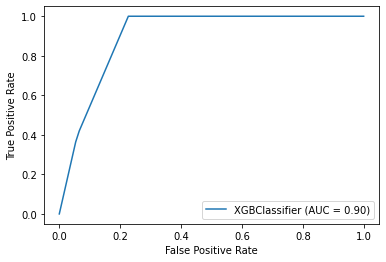

In [70]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_roc_curve(xgb_clf, X_test, y_test)

**Classification Report**

In [71]:
predictions = (xgb_clf.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87    207499
           1       0.81      1.00      0.90    207063

    accuracy                           0.89    414562
   macro avg       0.91      0.89      0.88    414562
weighted avg       0.91      0.89      0.88    414562



**Saving our model to svae time of traning it again and again**

In [72]:
xgb_clf.save_model('/content/drive/MyDrive/LendingClub/XGBOOST/XGB.model')

In [73]:
#Loading the model
import xgboost as xgb
loaded_xgb = xgb.Booster({'nthread': 4})  # init model
loaded_xgb.load_model('/content/drive/MyDrive/LendingClub/XGBOOST/XGB.model')

**Now we are done with this traning part lets plan how to give input to our model and make some new predictions**

# Making new predictions

In [114]:
new_predictions = []

In [117]:
var = [200000,692,45,0]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [120]:
var = [6000,604,14,5]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [122]:
var = [3600,692,5,10]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [123]:
var = [10000,657,25.5,3]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [127]:
var = [7200,672,14.5,10]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [128]:
var = [8006,543,12.6,12]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [130]:
var = [25121,622,12.4,6]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [126]:
data[30:40]

,amount_requested,risk_score,debt_to_income_ratio,employment_length,target
30,7000.0,732.0,13.06,10,1
31,21000.0,682.0,14.47,0,1
32,27500.0,702.0,6.79,10,1
33,7200.0,727.0,8.47,10,1
34,20000.0,692.0,12.45,6,1
35,20000.0,682.0,22.21,5,1
36,10000.0,687.0,35.70,2,0
37,20000.0,727.0,23.45,5,1
38,8650.0,752.0,7.28,0,1
39,21000.0,672.0,12.14,2,1


In [132]:
var = [21000,672,12.5,2]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [134]:
var = [55900,251,30.33,21]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

In [136]:
var = [60000,500,50,9]
new_predictions.append({'Input': var,
                        'Prediction' : xgb_clf.predict(var)[0]})

**That's Enough to understand the pattern**

**Lets print the predictions we just made**

In [137]:
print(*new_predictions,sep='\n')

{'Input': [200000, 692, 45, 0], 'Prediction': 0}
{'Input': [6000, 604, 14, 5], 'Prediction': 0}
{'Input': [3600, 692, 5, 10], 'Prediction': 1}
{'Input': [10000, 657, 25.5, 3], 'Prediction': 0}
{'Input': [7200, 672, 14.5, 10], 'Prediction': 1}
{'Input': [8006, 543, 12.6, 12], 'Prediction': 0}
{'Input': [25121, 622, 12.4, 6], 'Prediction': 0}
{'Input': [21000, 672, 12.5, 2], 'Prediction': 1}
{'Input': [55900, 251, 30.33, 21], 'Prediction': 0}
{'Input': [60000, 500, 50, 9], 'Prediction': 0}


## **So now we understood the pattern of how to give input and take output we will move to flask for further developement**